0.0
-50.56031402190559
-63.89551138233729
-66.06221646536154
-67.28129623559055
-67.09238763236863
-65.27484993602594
-63.16396049442624
-60.04009686709034
-56.888314467916
-52.62348603168858
-49.895193101394746
-46.970963906951035
-44.484604477953305
-42.75415489235892
-39.41512199872963
-36.67450616759994
-33.02726349451741
-30.90361119686538
-27.788947821172982
-25.065943072313015
-23.111351789164505
-20.874711548272522
-18.653352839685574
-16.325288730498233
-13.789729910590205
-11.99966807980355
-10.838061236762064
-9.507519953667684
-7.82441638710416
-6.690825748669587
-4.9492385124859775
-3.5387494406233917
-3.2948519096426447
-0.8796988722465916
0.5981536446587614
0.6831918561001695
1.0563537719000138
2.9603645627075026
4.489975906956135
4.75048703713058
3.9520084116578964
5.389518330826594
6.457040295016199
6.187126701625406
5.357313866374673
5.082645486842024
4.523592973919
3.6439254059282806
4.0514711063271225
3.0077659336279012
2.096736132864625
2.127055561253545
2.66911999

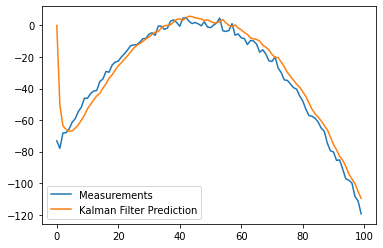

In [9]:
import numpy as np

class KalmanFilter(object):
    def __init__(self, F = None, B = None, H = None, Q = None, R = None, P = None, x0 = None):

        if(F is None or H is None):
            raise ValueError("Set proper system dynamics.")

        self.n = F.shape[1]
        self.m = H.shape[1]

        self.F = F
        self.H = H
        self.B = 0 if B is None else B
        self.Q = np.eye(self.n) if Q is None else Q
        self.R = np.eye(self.n) if R is None else R
        self.P = np.eye(self.n) if P is None else P
        self.x = np.zeros((self.n, 1)) if x0 is None else x0

    def predict(self, u = 0):
        self.x = np.dot(self.F, self.x) + np.dot(self.B, u)
        self.P = np.dot(np.dot(self.F, self.P), self.F.T) + self.Q
        return self.x

    def update(self, z):
        y = z - np.dot(self.H, self.x)
        S = self.R + np.dot(self.H, np.dot(self.P, self.H.T))
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))
        self.x = self.x + np.dot(K, y)
        I = np.eye(self.n)
        self.P = np.dot(np.dot(I - np.dot(K, self.H), self.P), 
            (I - np.dot(K, self.H)).T) + np.dot(np.dot(K, self.R), K.T)

def example():
    dt = 1.0/60
    F = np.array([[1, dt, 0], [0, 1, dt], [0, 0, 1]])
    H = np.array([1, 0, 0]).reshape(1, 3)
    Q = np.array([[0.05, 0.05, 0.0], [0.05, 0.05, 0.0], [0.0, 0.0, 0.0]])
    R = np.array([0.5]).reshape(1, 1)

    x = np.linspace(-10, 10, 100)
    measurements = - (x**2 + 2*x - 2)  + np.random.normal(0, 2, 100)

    kf = KalmanFilter(F = F, H = H, Q = Q, R = R)
    predictions = []

    for z in measurements:
        predictions.append(np.dot(H,  kf.predict())[0])
        print(float(np.dot(H,  kf.predict())[0]))
        kf.update(z)

    import matplotlib.pyplot as plt
    plt.plot(range(len(measurements)), measurements, label = 'Measurements')
    plt.plot(range(len(predictions)), np.array(predictions), label = 'Kalman Filter Prediction')
    plt.legend()
    plt.show()


if __name__ == '__main__':
    example()